# **HOMEWORK 2**
   With this homework, I learned about how to search things and use this informations. Firstly, there are some libraries we have to use like pandas, numpy. ***Pandas*** is for create **DataFrames** and working with them. ***Numpy*** is for question 2. I used *.unique* function to find all source airports. I added the following library, ***matplotlib.pyplot*** , to draw the graphics and the ***seaborn*** library is for heatmap. Lastly, in the question 2, I create a network with using ***networkx*** library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from urllib.request import urlopen
from collections import Counter

## Question 1
 + I opened the data using *'urlopen'* and made it usable with the fuction *'.read_csv'*.
 + This data shows us how much each film company made with which film in certain years. It also contains information about the audience, for example, the score they give.

In [88]:
with urlopen('https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv') as url:
    data = pd.read_csv(url)
data

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


+ With using *'Counter'*, I counted how many times a studio passes in the data. Then, I assigned the studio names to the left axis by making a list, and I made a bar graph by making their value on the bottom axis.
+ Using the same variables, I created a pie chart.

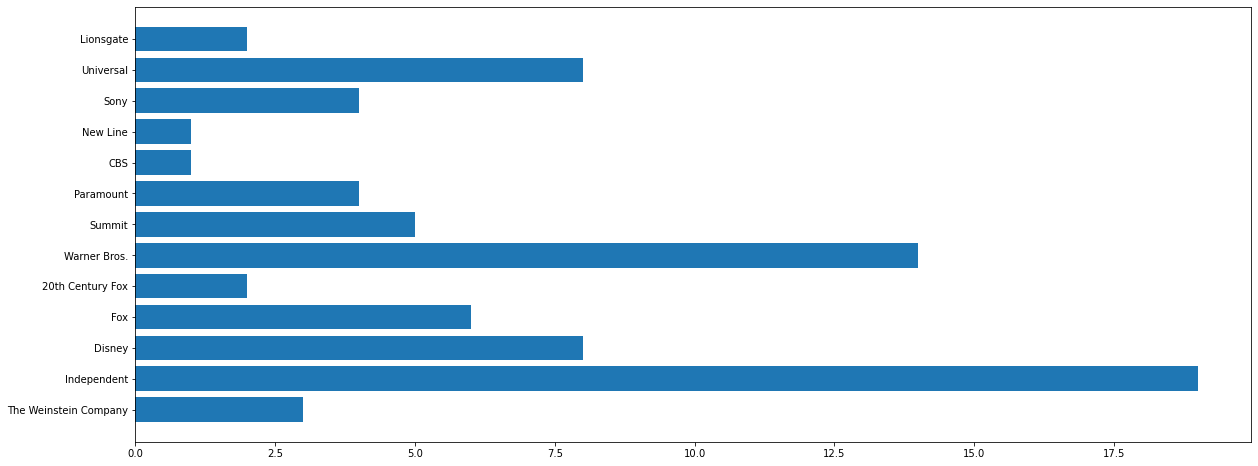

In [89]:
raw = Counter(data['Lead Studio'])
labels = list(raw.keys())
values = raw.values()
plt.barh(labels,values)
plt.rcParams['figure.figsize'] = 20, 8

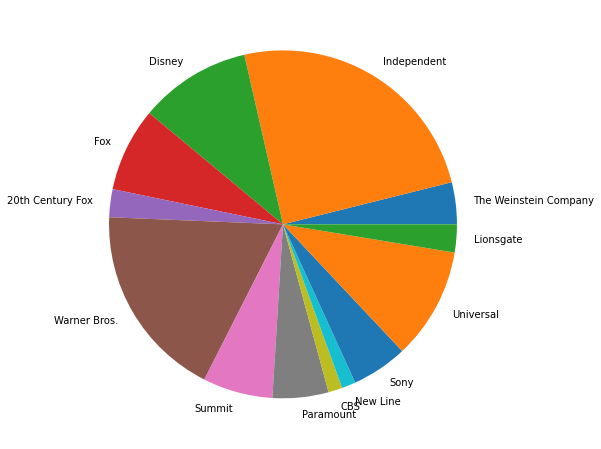

In [90]:
pie = plt.pie(values, labels=labels)

+ I also created cross-tabulated here and saw that movies of the same genre were written in different columns due to typos. Then I added these columns together so that there is only one column in that genre.
+ For this question lastly, I created a heatmap with corrected cross-tabulated.

In [96]:
cross = pd.crosstab(data['Year'],data['Genre'])
cross['Comedy'] = cross['Comedy']+cross['comedy']+cross['Comdy']
cross['Romance'] = cross['Romance']+cross['Romence']+cross['romance']
del cross['Comdy'],cross['comedy'],cross['Romence'],cross['romance']
cross

Genre,Action,Animation,Comedy,Drama,Fantasy,Romance
Year,,,,,,
2007,0,0,6,0,0,5
2008,0,1,13,3,1,2
2009,0,0,7,5,0,0
2010,1,1,16,2,0,0
2011,0,2,1,3,0,8


<AxesSubplot:xlabel='Genre', ylabel='Year'>

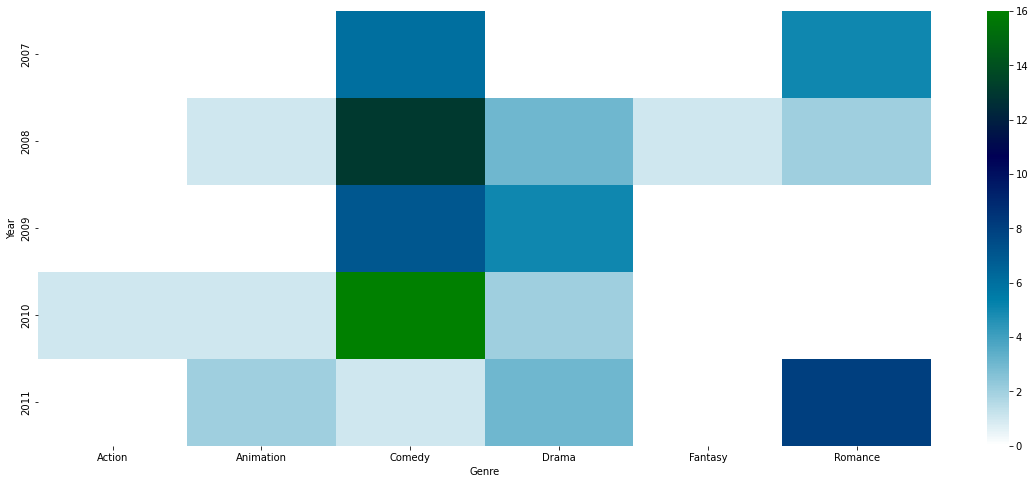

In [101]:
sns.heatmap(cross, cmap='ocean_r')

# Q2
+ For this question, we are using an open flight data. I used *'encoding = 'UTF-8''* because the data type is UTF-8 and the data has no column name. So, I used *'header = None'* . 
+ In the column *'Codeshare'* there are some *Nan* elements. To prevent this, I change it with *space*. Then rename the all columns.

In [3]:
with urlopen('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat') as url:
    data = pd.read_csv(url , header = None, encoding = 'UTF-8') 

In [4]:
for i in range (len(data)):
    if data.iloc[i,6]!='Y':
        data.iloc[i,6]=''

In [5]:
data.rename(columns = {0 : 'Airline', 1: 'Airline ID', 2: 'Source airport', 3: 'Source airport ID', 
                                  4: 'Destination airport', 5: 'Destination airport ID', 6: 'Codeshare', 7: 'Stops', 
                                  8: 'Equipment'}, inplace = True)
data

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,,0,CR2
1,2B,410,ASF,2966,KZN,2990,,0,CR2
2,2B,410,ASF,2966,MRV,2962,,0,CR2
3,2B,410,CEK,2968,KZN,2990,,0,CR2
4,2B,410,CEK,2968,OVB,4078,,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,,0,734
67660,ZM,19016,FRU,2912,DME,4029,,0,734
67661,ZM,19016,FRU,2912,OSS,2913,,0,734


+ I filtered the data as *'Source airport'* and *'Destination airport'*. 
+ After that, I singularized the airport names that are mentioned many times in the data so that they occur once, and counted the number of times they landed at the destination airports corresponding to these airport names. I converted this to a dataframe.
+ I found those that have been flown more than 10 times between these routes and I assigned it the column named *'Counts'*.

In [6]:
new_data = data.filter(['Source airport','Destination airport'], axis=1)

In [11]:
a = np.unique(data['Source airport'])
a = new_data[["Source airport", "Destination airport"]].value_counts()
a = pd.DataFrame(a)

In [12]:
aa = a[a.iloc[:,0]>10]
aa = aa.reset_index()
aa.rename(columns={0:"Counts"})

,Source airport,Destination airport,Counts
0,ORD,ATL,20
1,ATL,ORD,19
2,ORD,MSY,13
3,HKT,BKK,13
4,HKG,BKK,12
5,CAN,HGH,12
6,DOH,BAH,12
7,ATL,MIA,12
8,AUH,MCT,12
9,BKK,HKG,12


+ I initialized the source and target elements needed to create a network as *"Source airport"* and *"Destination airport"* columns.
+ Using this *'source'* and *'target'*, I constructed a network consisting of take-off and landing airports.

In [15]:
netw_data = aa.loc[:,('Source airport','Destination airport')]
netw_data.columns = ['source','target']
netw_data.dropna(inplace=True)

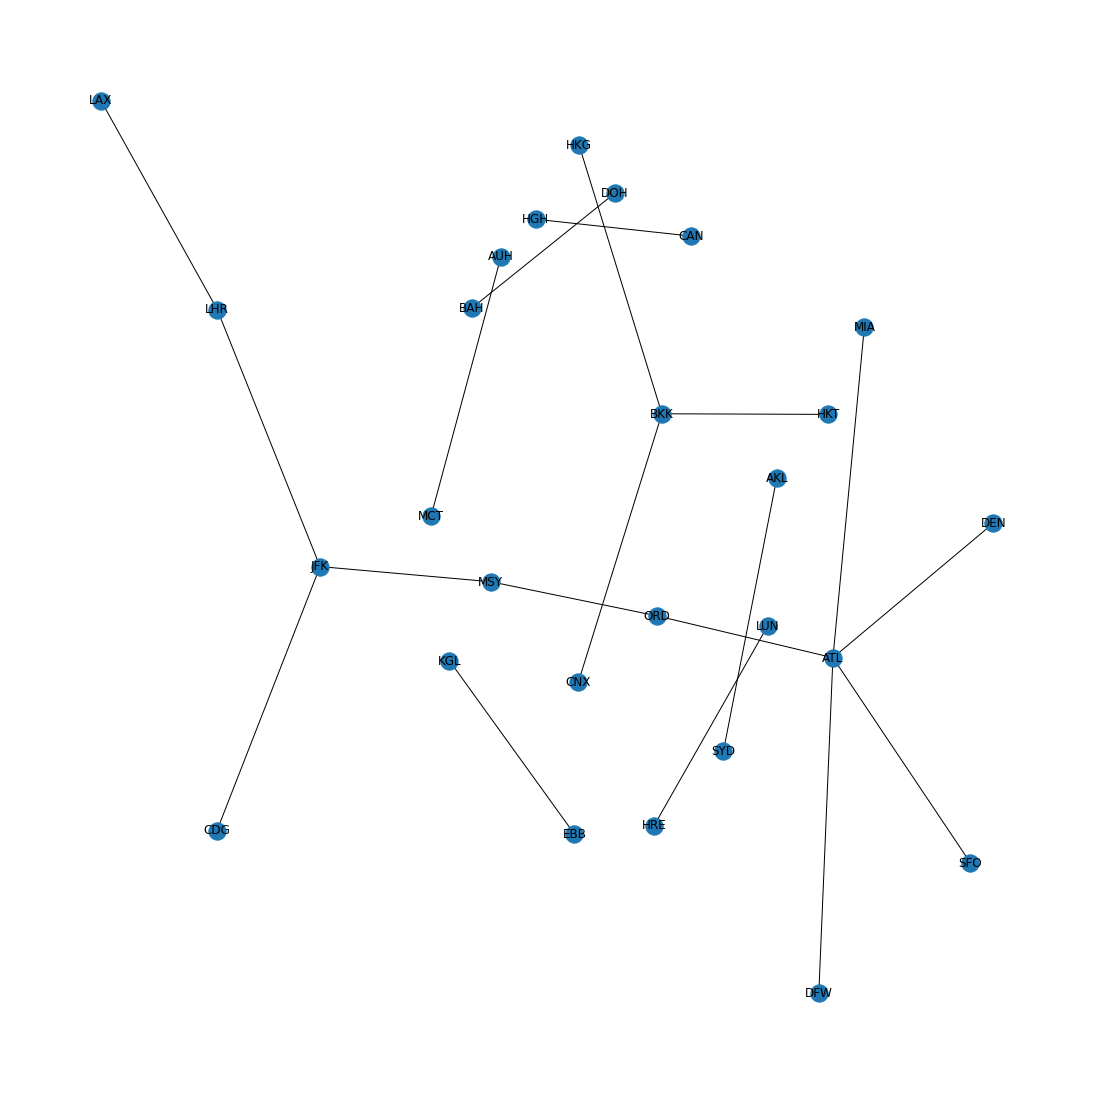

In [14]:
plt.rcParams['figure.figsize'] = 15,15

graph = nx.from_pandas_edgelist(pd.DataFrame(netw_data))
nx.draw_kamada_kawai(graph,with_labels=True)

# Q3

In [ ]:
with urlopen('https://sports-statistics.com/database/basketball-data/nba/NBA-playerlist.csv') as url:
    data = pd.read_csv(url)
data